In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_test = pd.read_csv("test.csv")

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [45]:
df_train = pd.read_csv("train.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

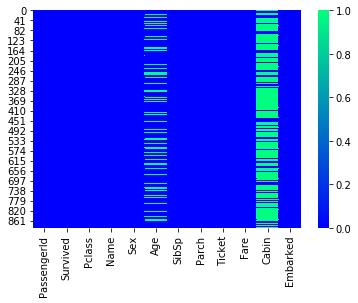

In [7]:
sns.heatmap(df_train.isnull(),cmap = "winter")

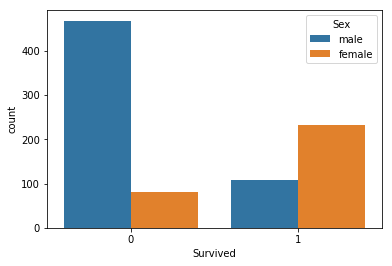

In [8]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df_train)

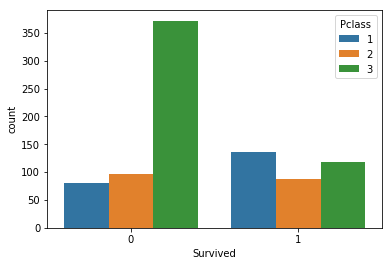

In [9]:
sns.countplot(x = 'Survived', hue = 'Pclass',data = df_train)

In [10]:
df_male = df_train[df_train['Sex'] == 'male']

In [11]:
df_male['Sex'].value_counts()

male    577
Name: Sex, dtype: int64

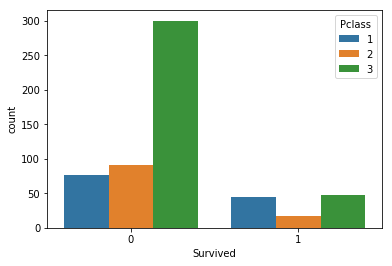

In [12]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df_male)

In [13]:
df_female = df_train[df_train['Sex'] == 'female']

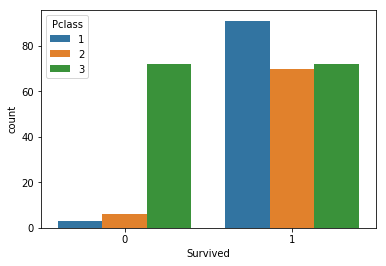

In [14]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df_female)

In [15]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
#fill in missing age data by finding mean age of passengers by sex and class

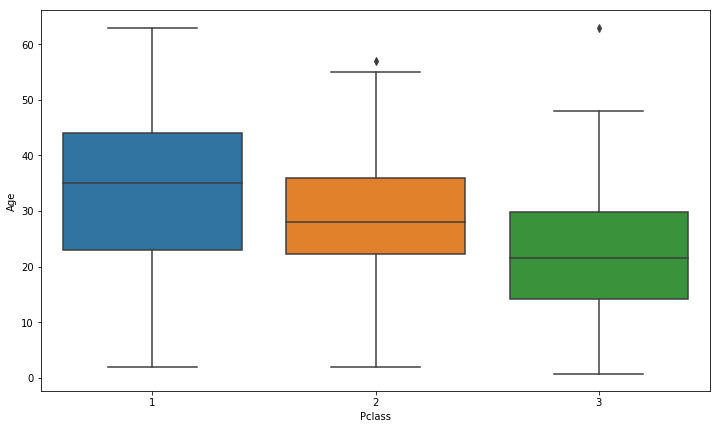

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y = 'Age', data = df_female)

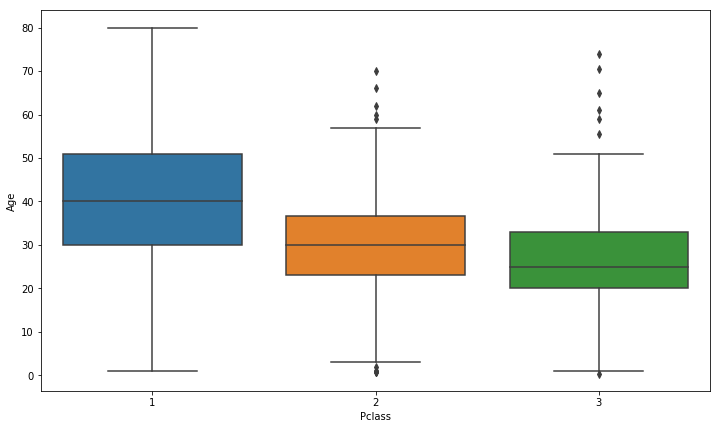

In [47]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df_male)

In [64]:
def fill_age_male(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 40

        elif Pclass == 2:
            return 30

        else:
            return 24

    else:
        return Age

In [65]:
def fill_age_female(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 35

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [63]:
df_male['Age'] = df_male[['Age','Pclass']].apply(fill_age_male,axis=1)

In [66]:
df_female['Age'] = df_female[['Age','Pclass']].apply(fill_age_female,axis = 1)

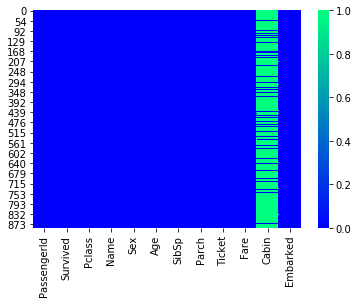

In [71]:
sns.heatmap(data = df_male.isnull(), cmap = 'winter')

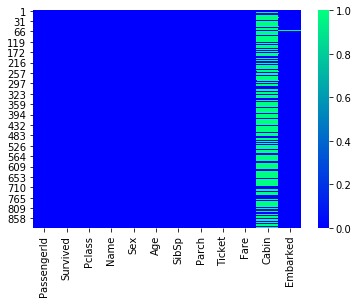

In [72]:
sns.heatmap(data = df_female.isnull(), cmap = 'winter')